# Q-Learning Algorithm Implementation

Equation:

![Q-Learning](images/q-learning-equation.png)
 
![Q-Learning-Training](images/q-learning.png)

In [1]:
# Import Dependencies
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Agent Class
class Agent():
    # Learning Rate -> alpha
    # Discount Factor -> gamma
    # num_actions -> A
    # num_states -> S
    # Epsilon greedy action selection parameter -> epsilon
    # Initial Valueof Epsilon -> epsiolon_start
    # Ending value of Epsilon after decreasing from initial value -> epsilon_end
    # Epsilon decrement factor -> epsilon_dec
    def __init__(self, learning_rate, gamma, num_actions, num_states, epsilon_start, epsilon_end, epsilon_dec):
        self.lr = learning_rate
        self.gamma = gamma
        self.num_actions = num_actions
        self.num_states = num_states
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_end
        self.epsilon_dec = epsilon_dec
        
        # Initialize Q-table as Empty Dictionary
        self.Q = {}
        
        # As per the algorithm, the Q-Table "Q(s,a)" is initialized with Arbitrary Values except for the 
        # terminal value which is set to "0"
        self.init_Q()
        
    # Function to Initialize Values in Q-Table "Q(s,a)"
    def init_Q(self):
        for state in range(self.num_states):
            for action in range(self.num_actions):
                # Since the initial values are to be selected arbitrarily, we set them all to "0's"
                self.Q[(state, action)] = 0.0
    
    # Function to Choose the Action using Epsilon-greedy method
    def choose_action(self, state):
        # If the random number is less than Epsilon, choose an action at random
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.num_actions)])
        # else, get the list of elements corresponding to the action values for the given state by looking
        # up the Q-table and finding index of maximal action from that list.
        else:
            actions = np.array([self.Q[(state, a)] for a in range(self.num_actions)])
            action = np.argmax(actions) 
        return action
    
    # Decrement Epsilon
    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.epsilon_dec if self.epsilon>self.epsilon_min else self.epsilon_min
        
    # Learn Function
    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_, a)] for a in range(self.num_actions)])
        a_max = np.argmax(actions)
        # Equation for Updating Action Value Function "Q"
        self.Q[(state, action)] += self.lr*(reward + self.gamma*self.Q[(state_, a_max)] - self.Q[(state, action)])
        self.decrement_epsilon()
        

Episode:  0 Win Percentage: 0.00 Epsilon: 1.00
Episode:  1000 Win Percentage: 0.00 Epsilon: 1.00
Episode:  2000 Win Percentage: 0.03 Epsilon: 0.99
Episode:  3000 Win Percentage: 0.00 Epsilon: 0.99
Episode:  4000 Win Percentage: 0.00 Epsilon: 0.98
Episode:  5000 Win Percentage: 0.02 Epsilon: 0.98
Episode:  6000 Win Percentage: 0.03 Epsilon: 0.98
Episode:  7000 Win Percentage: 0.02 Epsilon: 0.97
Episode:  8000 Win Percentage: 0.00 Epsilon: 0.97
Episode:  9000 Win Percentage: 0.01 Epsilon: 0.97
Episode:  10000 Win Percentage: 0.00 Epsilon: 0.96
Episode:  11000 Win Percentage: 0.02 Epsilon: 0.96
Episode:  12000 Win Percentage: 0.02 Epsilon: 0.96
Episode:  13000 Win Percentage: 0.03 Epsilon: 0.95
Episode:  14000 Win Percentage: 0.02 Epsilon: 0.95
Episode:  15000 Win Percentage: 0.01 Epsilon: 0.94
Episode:  16000 Win Percentage: 0.01 Epsilon: 0.94
Episode:  17000 Win Percentage: 0.02 Epsilon: 0.94
Episode:  18000 Win Percentage: 0.02 Epsilon: 0.93
Episode:  19000 Win Percentage: 0.01 Epsilon

Episode:  161000 Win Percentage: 0.07 Epsilon: 0.48
Episode:  162000 Win Percentage: 0.06 Epsilon: 0.47
Episode:  163000 Win Percentage: 0.07 Epsilon: 0.47
Episode:  164000 Win Percentage: 0.03 Epsilon: 0.47
Episode:  165000 Win Percentage: 0.08 Epsilon: 0.46
Episode:  166000 Win Percentage: 0.06 Epsilon: 0.46
Episode:  167000 Win Percentage: 0.06 Epsilon: 0.46
Episode:  168000 Win Percentage: 0.11 Epsilon: 0.46
Episode:  169000 Win Percentage: 0.10 Epsilon: 0.45
Episode:  170000 Win Percentage: 0.11 Epsilon: 0.45
Episode:  171000 Win Percentage: 0.08 Epsilon: 0.45
Episode:  172000 Win Percentage: 0.12 Epsilon: 0.44
Episode:  173000 Win Percentage: 0.11 Epsilon: 0.44
Episode:  174000 Win Percentage: 0.10 Epsilon: 0.44
Episode:  175000 Win Percentage: 0.07 Epsilon: 0.44
Episode:  176000 Win Percentage: 0.09 Epsilon: 0.43
Episode:  177000 Win Percentage: 0.10 Epsilon: 0.43
Episode:  178000 Win Percentage: 0.12 Epsilon: 0.43
Episode:  179000 Win Percentage: 0.14 Epsilon: 0.43
Episode:  18

Episode:  319000 Win Percentage: 0.34 Epsilon: 0.10
Episode:  320000 Win Percentage: 0.46 Epsilon: 0.10
Episode:  321000 Win Percentage: 0.46 Epsilon: 0.10
Episode:  322000 Win Percentage: 0.35 Epsilon: 0.10
Episode:  323000 Win Percentage: 0.44 Epsilon: 0.10
Episode:  324000 Win Percentage: 0.40 Epsilon: 0.09
Episode:  325000 Win Percentage: 0.40 Epsilon: 0.09
Episode:  326000 Win Percentage: 0.41 Epsilon: 0.09
Episode:  327000 Win Percentage: 0.42 Epsilon: 0.09
Episode:  328000 Win Percentage: 0.44 Epsilon: 0.09
Episode:  329000 Win Percentage: 0.32 Epsilon: 0.09
Episode:  330000 Win Percentage: 0.40 Epsilon: 0.09
Episode:  331000 Win Percentage: 0.32 Epsilon: 0.09
Episode:  332000 Win Percentage: 0.41 Epsilon: 0.08
Episode:  333000 Win Percentage: 0.37 Epsilon: 0.08
Episode:  334000 Win Percentage: 0.40 Epsilon: 0.08
Episode:  335000 Win Percentage: 0.45 Epsilon: 0.08
Episode:  336000 Win Percentage: 0.42 Epsilon: 0.08
Episode:  337000 Win Percentage: 0.45 Epsilon: 0.08
Episode:  33

Episode:  477000 Win Percentage: 0.65 Epsilon: 0.01
Episode:  478000 Win Percentage: 0.70 Epsilon: 0.01
Episode:  479000 Win Percentage: 0.70 Epsilon: 0.01
Episode:  480000 Win Percentage: 0.60 Epsilon: 0.01
Episode:  481000 Win Percentage: 0.71 Epsilon: 0.01
Episode:  482000 Win Percentage: 0.73 Epsilon: 0.01
Episode:  483000 Win Percentage: 0.72 Epsilon: 0.01
Episode:  484000 Win Percentage: 0.77 Epsilon: 0.01
Episode:  485000 Win Percentage: 0.67 Epsilon: 0.01
Episode:  486000 Win Percentage: 0.70 Epsilon: 0.01
Episode:  487000 Win Percentage: 0.68 Epsilon: 0.01
Episode:  488000 Win Percentage: 0.76 Epsilon: 0.01
Episode:  489000 Win Percentage: 0.68 Epsilon: 0.01
Episode:  490000 Win Percentage: 0.59 Epsilon: 0.01
Episode:  491000 Win Percentage: 0.61 Epsilon: 0.01
Episode:  492000 Win Percentage: 0.63 Epsilon: 0.01
Episode:  493000 Win Percentage: 0.66 Epsilon: 0.01
Episode:  494000 Win Percentage: 0.61 Epsilon: 0.01
Episode:  495000 Win Percentage: 0.66 Epsilon: 0.01
Episode:  49

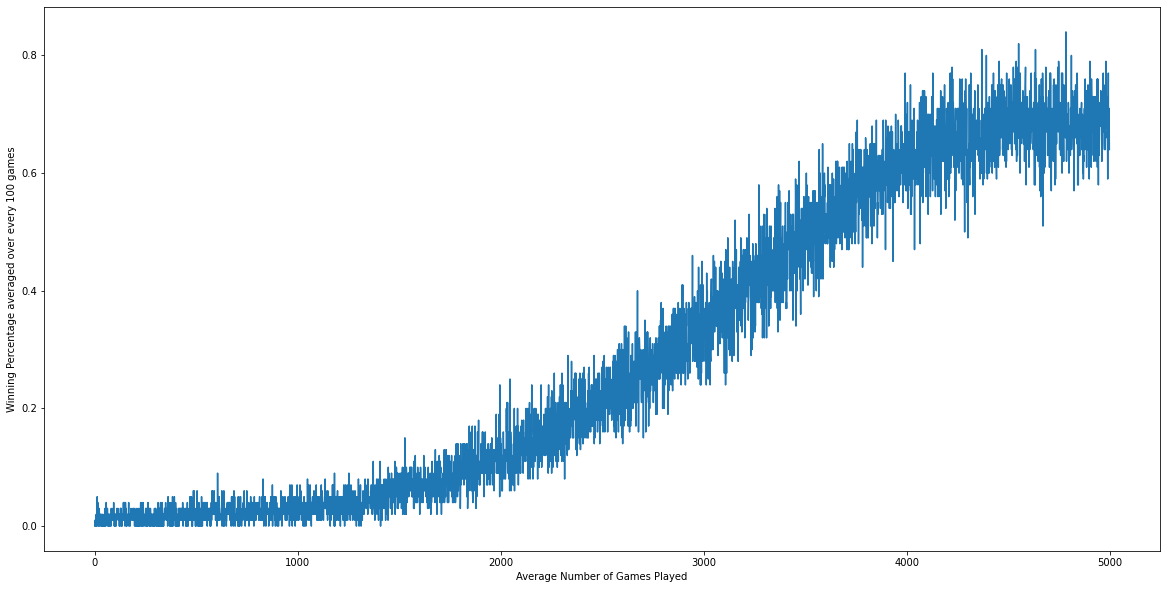

In [3]:
# Instantiate the Environment
env = gym.make('FrozenLake-v0')

# Call the Agent
agent = Agent(learning_rate=0.001, gamma=0.9, epsilon_start=1.0, epsilon_end=0.01, epsilon_dec=0.9999995, num_actions=4, num_states=16)

# Number of Games to Play
num_games = 500000

# Win Percentage
win_percent = []

# Scores
scores = []

# Run the Environment for 1000 Games
for i in range(num_games):
    # Done flag depicting end of game
    done = False
    # Initial Score
    score = 0
    # Reset the Environment
    obs = env.reset()
    # Play the Episode
    while not done:
        # Agent Takes a Random Action from the Action Space
        action = agent.choose_action(obs)
        # New observation, reward, done status and info
        obs_, reward, done, info = env.step(action)
        agent.learn(obs, action, reward, obs_)
        score += reward
        obs = obs_
    
    # Append final score to Scores
    scores.append(score)
    
    # Keep track of average win percentage for every last 10 games
    if i%100 == 0:
        average = np.mean(scores[-100:])
        win_percent.append(average)
        
        # Debug Info
        if i%1000 == 0:
            print('Episode: ', i, 'Win Percentage: %.2f' % average, 'Epsilon: %.2f' % agent.epsilon)

# Close the Environment once done
env.close()

# Plot Wins Percentage
plt.figure(figsize=(20,10))
plt.plot(win_percent)
plt.xlabel('Average Number of Games Played')
plt.ylabel('Winning Percentage averaged over every 100 games');

# Summary

1. Temporal difference learning is online learning method. It bootstraps by using one eestimate to update another.

2. Q-Learning is a tabular and off policy learning method that uses an epsilon greedy policy to update the estimate for the learning policy.